<a href="https://colab.research.google.com/github/hughmck/COMP472-Assignment1/blob/main/472A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comp 472 Assignment 1


# Process
Step 1 : Dataset Preparation & Analysis  
* 1.1 : Preprocessing  
* 1.2 : Extraction and plotting    

Step 2 : Words as Features   
Step 3 : Embeddings as Features
Step 4 : Analysis

## Step 1.1 : Preprocessing

In [1]:
# Imports
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_json("goemotions.json")
df.columns = ['text','emotion','sentiment']
size=df.shape[0]

In [4]:
emotion = df['emotion']
display(emotion)
sentiment = df['sentiment']
display(sentiment)

0            sadness
1            neutral
2               love
3            neutral
4          gratitude
             ...    
171815           joy
171816          love
171817        caring
171818    admiration
171819         anger
Name: emotion, Length: 171820, dtype: object

0         negative
1          neutral
2         positive
3          neutral
4         positive
            ...   
171815    positive
171816    positive
171817    positive
171818    positive
171819    negative
Name: sentiment, Length: 171820, dtype: object

### Step 1.2 : Extraction and plotting

In [17]:
# Distributions of sentiments
positive = df.loc[df['sentiment'] == 'positive']
neutral = df.loc[df['sentiment'] == 'neutral']
ambiguous = df.loc[df['sentiment'] == 'ambiguous']
negative = df.loc[df['sentiment'] == 'negative']

# percentage of each sentiment
p = (positive.shape[0])/size
n = (neutral.shape[0])/size
neg = (negative.shape[0])/size
a = (ambiguous.shape[0])/size

# printing the number of posts in each sentiment category
print(f'positive count: {positive.shape[0]}') 
print(f'neutral count: {neutral.shape[0]}')
print(f'ambiguous count: {ambiguous.shape[0]}')
print(f'negative count: {negative.shape[0]}')


#Distributions of emotions
emotions_lst = df['emotion'].value_counts().to_dict()
emotions_lst


positive count: 58968
neutral count: 55298
ambiguous count: 19009
negative count: 38545


{'neutral': 55298,
 'approval': 11259,
 'admiration': 10531,
 'annoyance': 8342,
 'disapproval': 7686,
 'gratitude': 7075,
 'amusement': 6130,
 'curiosity': 5885,
 'anger': 5202,
 'love': 4957,
 'confusion': 4938,
 'realization': 4714,
 'disappointment': 4706,
 'optimism': 4519,
 'joy': 4329,
 'sadness': 3827,
 'caring': 3523,
 'surprise': 3472,
 'excitement': 3020,
 'disgust': 2914,
 'desire': 2147,
 'fear': 1778,
 'remorse': 1510,
 'embarrassment': 1433,
 'nervousness': 796,
 'relief': 788,
 'pride': 690,
 'grief': 351}

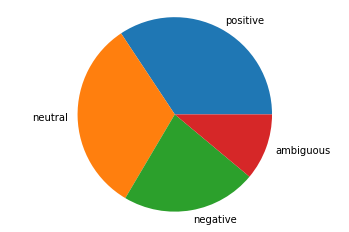

In [18]:
# Sentiment Pie Chart
sentimentChart = np.array([p,n,neg,a]) # setting the sentiment pie chart
sentimentChartLabels = ["positive", "neutral", "negative", "ambiguous"]

plt.pie(sentimentChart, labels = sentimentChartLabels)
plt.axis('equal')
plt.savefig('sentiment_piechart.png', dpi = 300)
plt.show()

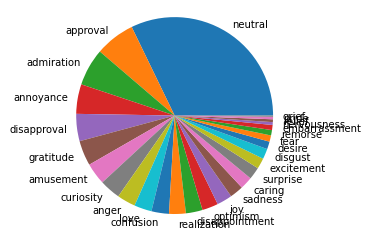

In [19]:
# Emotions Pie Chart
labels = []
sizes = []

for x, y in emotions_lst.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.savefig('emotions_piechart.png', dpi = 300)
plt.show()

## Step 2.1 : Words as Features   
